<a href="https://colab.research.google.com/github/KenyanGeek/Fraud-Detections-using-Fast.ai-Unbalanced-Data/blob/master/Xente_Fraud_Detection_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Fraud at Xende

Importing important libraries

In [0]:
!pip install fastai==1.0.51


     |████████████████████████████████| 215kB 3.5MB/s 
  Found existing installation: fastai 1.0.2
    Uninstalling fastai-1.0.2:
      Successfully uninstalled fastai-1.0.2


In [0]:
from fastai.tabular import *
import pandas as pd

Tabular data should be in a Pandas `DataFrame`.

In [0]:
from google.colab import files
uploaded = files.upload()


Saving training2(90,000-90000).csv to training2(90,000-90000) (1).csv


In [0]:
import io


df_train = pd.read_csv(io.BytesIO(uploaded['training2(90,000-90000).csv']))

df_train




NameError: ignored

In [0]:
import os 
os.makedirs('tmp', exist_ok=True)
df_train.to_feather('traindata')

In [0]:
df_train = pd.read_feather('traindata')

#Manipulating the Data to handle the imbalanced data challenge

In [0]:
#from sklearn.utils import resample


# Separate majority and minority classes
#df_majority = df_train[df_train.FraudResult==0]
#df_minority = df_train[df_train.FraudResult==1] 
 
# Upsample minority class
#df_minority_upsampled = resample(df_minority, 
                                 #replace=True,     # sample with replacement
                                # n_samples=20000# to match majority class
                                 ) # reproducible results
 
# Combine majority class with upsampled minority class
#df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
#df_upsampled.FraudResult.value_counts()


0    95471
1    20000
Name: FraudResult, dtype: int64

##Creating more Variable

In [0]:
#add_datepart(df_upsampled,'TransactionStartTime')

#add_datepart(df_train,'TransactionStartTime')
df_train

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,TransactionStartTimeYear,TransactionStartTimeMonth,TransactionStartTimeWeek,TransactionStartTimeDay,TransactionStartTimeDayofweek,TransactionStartTimeDayofyear,TransactionStartTimeIs_month_end,TransactionStartTimeIs_month_start,TransactionStartTimeIs_quarter_end,TransactionStartTimeIs_quarter_start,TransactionStartTimeIs_year_end,TransactionStartTimeIs_year_start,TransactionStartTimeElapsed
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,2018,11,46,15,3,319,False,False,False,False,False,False,1542248329
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,2018,11,46,15,3,319,False,False,False,False,False,False,1542248348
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,2018,11,46,15,3,319,False,False,False,False,False,False,1542249861
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0,2018,11,46,15,3,319,False,False,False,False,False,False,1542252775
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,2018,11,46,15,3,319,False,False,False,False,False,False,1542252861
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2,0,2018,11,46,15,3,319,False,False,False,False,False,False,1542252910
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,4,0,2018,11,46,15,3,319,False,False,False,False,False,False,1542253471
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2,0,2018,11,46,15,3,319,False,False,False,False,False,False,1542253513
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2,0,2018,11,46,15,3,319,False,False,False,False,False,False,1542255299
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2,0,2018,11,46,15,3,319,False,False,False,False,False,False,1542256308


In [0]:
dep_var = 'FraudResult'

cat_names = ['TransactionId','BatchId','AccountId','SubscriptionId','CustomerId','CurrencyCode','CountryCode','ProviderId','ProductId','ProductCategory','ChannelId','PricingStrategy',
             'TransactionStartTime']

'''cat_names = ['TransactionId','BatchId','AccountId','SubscriptionId','CustomerId','CurrencyCode','CountryCode','ProviderId','ProductId','ProductCategory','ChannelId','PricingStrategy',
             'TransactionStartTimeYear','TransactionStartTimeMonth',
             'TransactionStartTimeWeek','TransactionStartTimeDay','TransactionStartTimeDayofweek','TransactionStartTimeDayofyear',
             'TransactionStartTimeIs_month_end','TransactionStartTimeIs_month_start',
             'TransactionStartTimeIs_quarter_end','TransactionStartTimeIs_quarter_start','TransactionStartTimeIs_year_end',
             'TransactionStartTimeIs_year_start','TransactionStartTimeElapsed']'''
cont_names = ['Amount','Value']
procs = [FillMissing, Categorify, Normalize]

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'


Saving test.csv to test (1).csv


In [0]:
df_train = pd.read_csv('/content/gdrive/My Drive/data/training.csv')


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4,NaN
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2,NaN
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2,NaN
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4,NaN
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2,NaN
5,TransactionId_134338,BatchId_67575,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:03:12Z,2,NaN
6,TransactionId_109096,BatchId_52375,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:03:48Z,2,NaN
7,TransactionId_14249,BatchId_112552,AccountId_2908,SubscriptionId_2977,CustomerId_3332,UGX,256,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:09:46Z,1,NaN
8,TransactionId_69896,BatchId_60867,AccountId_4841,SubscriptionId_3829,CustomerId_3332,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:11:24Z,2,NaN
9,TransactionId_91468,BatchId_14721,AccountId_460,SubscriptionId_2976,CustomerId_790,UGX,256,ProviderId_3,ProductId_14,financial_services,ChannelId_3,1161.0,1161,2019-02-13T10:12:08Z,0,NaN


In [0]:
df_test = pd.read_csv('/content/gdrive/My Drive/data/test.csv')

#df_test = add_datepart(df_test,'TransactionStartTime')

In [0]:

valid_idx = range(77000, 113000)


test = TabularList.from_df(df_test, cat_names=cat_names, cont_names=cont_names, procs=procs) 


In [0]:
data = (TabularList.from_df(df_train, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idx)
                           .label_from_df(cols=dep_var)
                           .add_test(test, label = 'FraudResult')
                           .databunch())


In [0]:
data.show_batch(rows=5)

TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,TransactionStartTime,Amount,Value,target
TransactionId_107748,BatchId_135854,AccountId_4841,SubscriptionId_3829,CustomerId_5174,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2,2018-12-08T11:34:34Z,-0.4605,-0.4724,0
TransactionId_56012,BatchId_120597,AccountId_4841,SubscriptionId_3829,CustomerId_3694,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2,2019-01-25T03:45:38Z,-0.4605,-0.4724,0
TransactionId_83584,BatchId_43757,AccountId_352,SubscriptionId_1465,CustomerId_682,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,2,2019-02-09T11:09:20Z,0.2246,0.2157,1
TransactionId_110338,BatchId_51205,AccountId_4421,SubscriptionId_4038,CustomerId_4878,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,2,2018-12-11T13:30:46Z,-0.1532,-0.1639,1
TransactionId_26833,BatchId_135755,AccountId_4841,SubscriptionId_3829,CustomerId_2676,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2,2019-01-17T06:24:55Z,-0.4605,-0.4724,0


In [0]:


learn = tabular_learner(data, layers=[1000,500], metrics=accuracy)
#learn = tabular_learner(data, layers=[2000,1000], metrics=[accuracy,  Precision(), Recall()] )


In [0]:
!export LD_LIBRARY_PATH= "/usr/local/cuda-9.1/lib64"

/bin/bash: line 0: export: `/usr/local/cuda-9.1/lib64': not a valid identifier


In [0]:

#learn.fit(1, 1e-2)
learn.fit_one_cycle(1, 2.5e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.000022,0.002066,0.998667,02:32


In [0]:
probs = learn.get_preds(ds_type=DatasetType.Test)[0]

def probs2class(item): 
    return max(range(len(item)), key=item.__getitem__) 

test_df = pd.DataFrame({'TransactionId': df_test['TransactionId'], 'target': list(map(probs2class, probs))})
test_df.to_csv('xende predictions-.csv', header=True, index=False)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


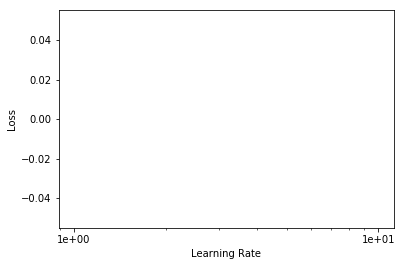

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.000004,0.037253,0.995889,02:36


## Inference

## Here i can predict with 100% accuracy

In [0]:

probs = learn.get_preds(ds_type=DatasetType.Test)[0]

def probs2class(item): 
    return max(range(len(item)), key=item.__getitem__) 

test_df = pd.DataFrame({'TransactionId': df_test['TransactionId'], 'target': list(map(probs2class, probs))})
test_df.to_csv('xende predictions3.csv', header=True, index=False)

